In [11]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<Axes: >

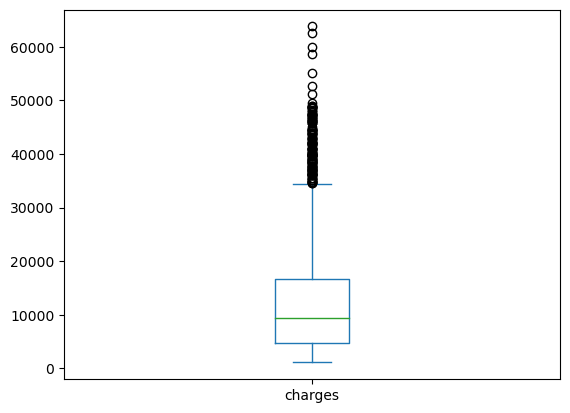

In [12]:
df.charges.plot(kind='box')

Jml baris sebelum dan sesudah dihapus outlier:  1338 1181


<Axes: >

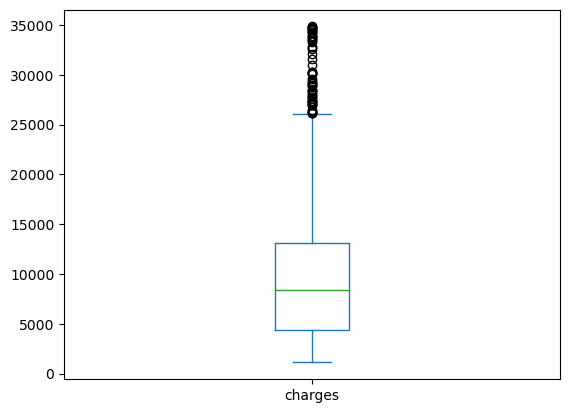

In [13]:
#Removin outlier
from pandas.api.types import is_numeric_dtype


def remove_outlier(df_in):
    for col in list(df_in.columns):
        if is_numeric_dtype(df_in[col]):
            Q1 = df_in[col].quantile(0.25)
            Q3 = df_in[col].quantile(0.75)

            IQR = Q3 - Q1
            low_lim = Q1 - 1.5 * IQR
            up_lim = Q3 + 1.5 * IQR

            df_in = df_in.loc[(df_in[col] > low_lim) & (df_in[col] < up_lim)]

    return df_in


df_clean = remove_outlier(df)
print("Jml baris sebelum dan sesudah dihapus outlier: ", len(df), len(df_clean))

df_clean.charges.plot(kind='box')

In [14]:
#encoding data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = ['sex', 'smoker', 'region']

transformer = make_column_transformer((OneHotEncoder(), cat_cols), remainder='passthrough')

df_clean = pd.DataFrame(transformer.fit_transform(df_clean))

In [15]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(columns=[11]), df_clean[11], test_size=0.3,
                                                    random_state=11)
# 11 itu kolom charges

In [16]:
# min max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Latih model RFR
from sklearn.ensemble import RandomForestRegressor

RFR_noscale = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=11).fit(X_train, y_train)

RFR_scale = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=11).fit(X_train_scaled, y_train)

In [18]:
#Latih model ridge regression
from sklearn.linear_model import Ridge

RD = Ridge(alpha=0.1).fit(X_train_scaled, y_train)

In [19]:
#Latih model lasso regression
from sklearn.linear_model import Lasso

LS = Lasso(alpha=0.1, max_iter=1000).fit(X_train_scaled, y_train)

In [20]:
# test akurasi model-model
from sklearn.metrics import mean_squared_error

df_results = pd.DataFrame(y_test)
df_results['RFR_noscale'] = RFR_noscale.predict(X_test)
df_results['RFR_scale'] = RFR_scale.predict(X_test_scaled)
df_results['RD'] = RD.predict(X_test_scaled)
df_results['LS'] = LS.predict(X_test_scaled)
print(df_results.head(10))

print("MSE RFR_noscale: ", mean_squared_error(df_results[11], df_results['RFR_noscale']))
print("MSE RFR_scale: ", mean_squared_error(df_results[11], df_results['RFR_scale']))
print("RMSE RFR_noscale: ", mean_squared_error(df_results[11], df_results['RFR_noscale'], squared=False))
print("RMSE RFR_scale: ", mean_squared_error(df_results[11], df_results['RFR_scale'], squared=False))
print("RMSE RD: ", mean_squared_error(df_results[11], df_results['RD'], squared=False))
print("RMSE LS: ", mean_squared_error(df_results[11], df_results['LS'], squared=False))

               11   RFR_noscale     RFR_scale            RD            LS
1117  26926.51440  27574.451573  27574.451573  28136.460395  28150.827659
746   12622.17950  13087.733361  13087.733361  13171.426135  13175.905243
83     6186.12700   6725.806685   6725.806685   7971.785535   7971.748315
1000  11085.58680  12193.974253  12193.974253  11956.949248  11958.203746
189   10355.64100  12234.367793  12234.367793  11305.476397  11307.054493
77     5729.00530   6848.215210   6848.215210   8525.987121   8525.073636
183    1980.07000   3677.751865   3677.751865   3446.337888   3441.203093
431   24513.09126  14348.395503  14348.395503  12047.475465  12050.710614
920   20234.85475  20394.876010  20394.876010  22706.614807  22713.581589
31     3046.06200   4578.407217   4578.407217   4556.973135   4550.255116
MSE RFR_noscale:  17354515.46502114
MSE RFR_scale:  17354893.91097196
RMSE RFR_noscale:  4165.875113949186
RMSE RFR_scale:  4165.920535844624
RMSE RD:  4646.08579341805
RMSE LS:  4646.26